In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv('diabetes.csv')


In [39]:
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,8,183,64,0,0,23.3,0.672,32,pos
2,0,137,40,35,168,43.1,2.288,33,pos
3,3,78,50,32,88,31.0,0.248,26,pos
4,2,197,70,45,543,30.5,0.158,53,pos
5,8,125,96,0,0,0.0,0.232,54,pos


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               549 non-null    int64  
 1   Glucose                   549 non-null    int64  
 2   BloodPressure             549 non-null    int64  
 3   SkinThickness             549 non-null    int64  
 4   Insulin                   549 non-null    int64  
 5   BMI                       549 non-null    float64
 6   DiabetesPedigreeFunction  549 non-null    float64
 7   Age                       549 non-null    int64  
 8   Diabetes                  549 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 38.7+ KB


C:\Users\motur\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Diabetes', ylabel='count'>

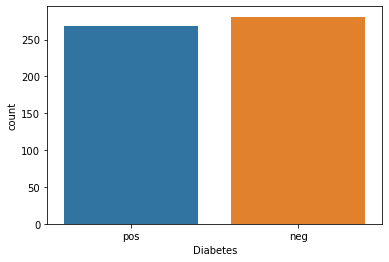

In [41]:
sns.countplot(df['Diabetes'])

In [42]:
from sklearn.model_selection import train_test_split
import random 

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=70)
random.seed(1234)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

#testing performed for taking n_neighbors

tr_accuracy = []
te_accuracy = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    tr_accuracy.append(knn.score(X_train, y_train))
    te_accuracy.append(knn.score(X_test, y_test))
print(tr_accuracy)
print(te_accuracy)



[1.0, 0.8102189781021898, 0.8175182481751825, 0.7931873479318735, 0.8029197080291971, 0.7931873479318735, 0.7834549878345499, 0.7834549878345499, 0.7493917274939172, 0.7761557177615572]
[0.782608695652174, 0.7391304347826086, 0.782608695652174, 0.7608695652173914, 0.7608695652173914, 0.7753623188405797, 0.7753623188405797, 0.7536231884057971, 0.7391304347826086, 0.7608695652173914]


In [44]:
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        78
           1       0.75      0.72      0.74        60

    accuracy                           0.78       138
   macro avg       0.77      0.77      0.77       138
weighted avg       0.77      0.78      0.77       138



Accuracy Of Our Model : 0.78


Confusion Matrix : 
 [[64 14]
 [17 43]]


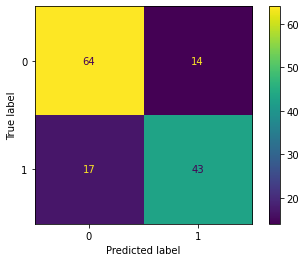

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

print('Classification Report : \n',classification_report(y_test,y_pred))
print('\n')
print('Accuracy Of Our Model : {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('\n')
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))
print(plot_confusion_matrix(knn,X_test,y_test))

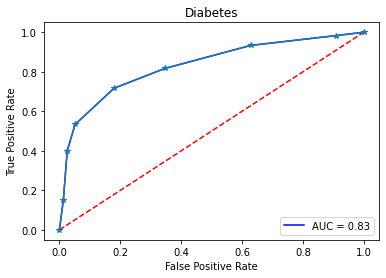

In [46]:
import sklearn.metrics as metrics

probs =knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Diabetes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr, marker='*')